In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import numpy as np
import scipy as sp
import scipy.integrate
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from spectral import *
np.set_printoptions(linewidth=120)
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['animation.html'] = 'html5'
import matplotlib.patches
#%matplotlib notebook

# Single analysis

In [2]:
direct = 'simulation_samples/FullEqn_ivp_soliton_gen_PS_A-0.001/'

In [3]:
%run -i 'simulation_samples/FullEqn_ivp_soliton_gen_PS_A-0.001/data.py'

In [4]:
mesh_grid = np.load(direct + 'mesh_grid.npy')
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T = np.load(direct + 'time.npy')
E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

In [5]:
A0 = 0.001
width = 20

In [6]:
U = TensorField(mesh, U_func)

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
plt.xlim(-100, L)
plt.ylim(-0.5, 1.5)
plt.grid()
line, = ax.plot([], [])
line2, = ax.plot([], [])
time_template = 'time = %.1f'
time_text = ax.text(0.75, 0.9, '', transform=ax.transAxes)
plt.xlabel(r'$x$')
plt.ylabel(r'$U_x(x, 0, 0)$')
plt.close()
x = np.linspace(-100, L, 3000)

def animate(k):
    u = -U[k, 0].diff()(None, 0, 0)/A0
    line.set_data(x, u(x + c*T[k]))
    #line2.set_data(x, damp(T[k])(x + 0*T[k], 0, 0) - 0.5)
    time_text.set_text(time_template % T[k])
    return line, time_text

anim = animation.FuncAnimation(fig, animate, 
                               frames=len(T), interval=100, blit=True)

In [10]:
anim

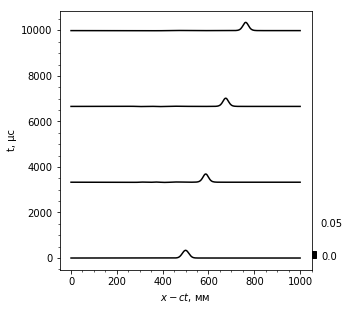

In [20]:
X = np.array(mesh_x.grid())[0]
fig = plt.figure(figsize=(5,4))
plt.subplots_adjust(left=0.15, right=0.85, top=1, bottom=0.1)
ax = plt.axes()
ax.set_xlabel(r'$x - ct$, мм')
ax.set_ylabel('t, μс')
sc = 300
for i in range(0, len(T), int(len(T)/3)):
    u = U[i, 0].diff(0)(X + c*T[i], 0, 0)/A0
    ax.plot(X, np.ones_like(X)*T[i] - u*sc, color = 'black')
ax.minorticks_on()
rect = matplotlib.patches.Rectangle((1050,0), 20, sc, color='black',
                                   clip_on=False)
ax.add_patch(rect)
ax.text(0.876, 0.135, '0.0', transform=fig.transFigure)
ax.text(0.875, 0.25, '0.05', transform=fig.transFigure)
#fig.savefig(direct + 'SolEvol2.pdf')

In [8]:
T = T[:101]

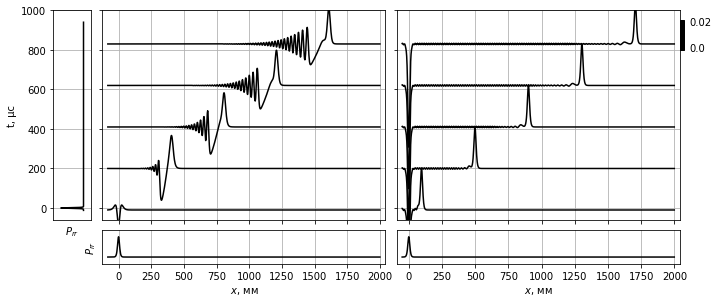

In [183]:
tau = 2
t0 = -6*tau
t_max = 940.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)
start = 1150

X = np.array(mesh_x.grid())[0]
fig = plt.figure(figsize=(10,4))
grid = plt.GridSpec(6, 13, wspace=0.3, hspace=0.3,
                    left=0.08, right=0.95, top=0.98, bottom=0.1)
ax1 = fig.add_subplot(grid[:-1, 0])
ax2 = fig.add_subplot(grid[:-1, 1:7], sharey=ax1)
ax3 = fig.add_subplot(grid[-1, 1:7])
ax1.set_xticks([])
ax3.set_yticks([])
ax1.set_xlabel(r'$P_{rr}$')
ax3.set_ylabel(r'$P_{rr}$')
ax3.set_xlabel(r'$x$, мм')
ax1.set_ylabel('t, μс')
ax2.margins(0.02)
ax3.margins(0.02)

X = np.array(mesh_x.grid())[0]
sc = 150
for i in range(5, len(T), int(len(T)/5)):
    u = U[i, 0].diff(0)(X[start:] + 0*T[i], 0, 0)/A0
    ax2.plot(X[start:]-L/2, np.ones_like(X[start:])*T[i] - u*sc, color = 'black')
#ax2.minorticks_on()
rect = matplotlib.patches.Rectangle((4080,800), 35, sc, color='black',
                                   clip_on=False)#, transform=fig.transFigure)
#ax2.add_patch(rect)
#ax2.text(0.935, 0.825, '0.0', transform=fig.transFigure)
#ax2.text(0.935, 0.94, '0.02', transform=fig.transFigure)
ax1.plot(-3e-1*np.cosh(TT/2)**(-2), TT, color='black')
ax3.plot(X[start:]-L/2, 3e-1*np.cosh((X[start:] - L/2)/10)**(-2), color='black')
ax1.set_xlim(-0.4, 0.1)
ax3.set_ylim(-0.1, 0.4)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

# second plot #####################################################
tau = 2
t0 = -6*tau
t_max = 940.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)

ax4 = fig.add_subplot(grid[:-1, 7:], sharey=ax1)
ax5 = fig.add_subplot(grid[-1, 7:])
ax1.set_xticks([])
ax5.set_yticks([])
ax5.set_xlabel(r'$x$, мм')
ax4.margins(0.02)
ax5.margins(0.02)

start = 1950
for i in range(5, len(T), int(len(T)/5)):
    u = U_Bq[i,start:]/A0
    ax4.plot(X2[start:]-L/2, np.ones_like(X2[start:])*T_Bq[i] - u*sc, color = 'black')
#ax.minorticks_on()
rect = matplotlib.patches.Rectangle((2040,800), 30, sc, color='black',
                                   clip_on=False)#, transform=fig.transFigure)
ax4.add_patch(rect)
ax4.text(0.963, 0.84, '0.0', transform=fig.transFigure)
ax4.text(0.963, 0.93, '0.02', transform=fig.transFigure)
ax5.plot(X2[start:]-L/2, 3e-1*np.cosh((X2[start:] - L/2)/10)**(-2), color='black')
ax5.set_ylim(-0.1, 0.4)
ax4.set_ylim(T[0], 1000)
ax4.grid()
ax2.grid()
ax1.grid()
ax3.grid()
ax5.grid()
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

fig.savefig(direct + 'SurfImpact.pdf')
plt.show()

In [256]:
T = T[:98]

In [273]:
A0 = 0.015

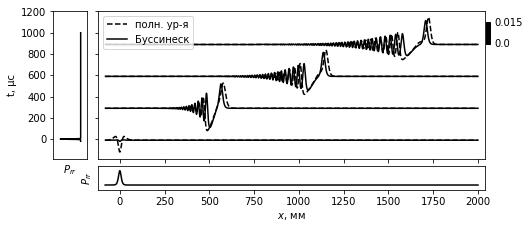

In [291]:
tau = 5
t0 = -4*tau
t_max = 1000.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)
start = 1150
start2 = 4800

X = np.array(mesh_x.grid())[0]
fig = plt.figure(figsize=(8,3))
grid = plt.GridSpec(6, 10, wspace=0.3, hspace=0.3,
                    left=0.13, right=0.88, top=0.98, bottom=0.15)
ax1 = fig.add_subplot(grid[:-1, 0])
ax2 = fig.add_subplot(grid[:-1, 1:], sharey=ax1)
ax3 = fig.add_subplot(grid[-1, 1:])
ax1.set_xticks([])
ax3.set_yticks([])
ax1.set_xlabel(r'$P_{rr}$')
ax3.set_ylabel(r'$P_{rr}$')
ax3.set_xlabel(r'$x$, мм')
ax1.set_ylabel('t, μс')
ax2.margins(0.02)
ax3.margins(0.02)

X = np.array(mesh_x.grid())[0]
sc = 210
for i in range(5, len(T), int(len(T)/3)-2):
    u = U[i, 0].diff(0)(X[start:] + 0*T[i], 0, 0)/A0
    ax2.plot(X[start:]-L/2, np.ones_like(X[start:])*T[i] - u*sc, '--', color = 'black')
    u = U_Bq[i - 4, start2:]/A0
    ax2.plot(X2[start2:]-L/2, np.ones_like(X2[start2:])*T_Bq[i - 4] - u*sc, color = 'black')
#ax2.minorticks_on()
rect = matplotlib.patches.Rectangle((2045,890), 20, sc, color='black',
                                   clip_on=False)#, transform=fig.transFigure)
ax2.add_patch(rect)
ax2.text(0.895, 0.81, '0.0', transform=fig.transFigure)
ax2.text(0.895, 0.91, '0.015', transform=fig.transFigure)
ax1.plot(-3e-1*np.cosh(TT/2)**(-2), TT, color='black')
ax3.plot(X[start:]-L/2, 3e-1*np.cosh((X[start:] - L/2)/10)**(-2), color='black')
ax1.set_xlim(-0.4, 0.1)
ax3.set_ylim(-0.1, 0.4)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.legend(['полн. ур-я', 'Буссинеск'], loc=2)

ax1.set_xticks([])
ax5.set_yticks([])

fig.savefig(direct + 'SurfImpactSmall.pdf')
plt.show()

In [84]:
len(T)

52

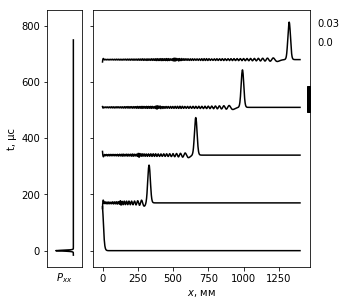

In [100]:
tau = 2
t0 = -8*tau
t_max = 750.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)

X = np.array(mesh_x.grid())[0]
fig = plt.figure(figsize=(5,4))
grid = plt.GridSpec(1, 6, wspace=0.3, hspace=0,
                    left=0.15, right=0.88, top=0.99, bottom=0.1)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1:], sharey=ax1)
ax2.sharey=ax1
ax1.set_xticks([])
ax1.set_xlabel(r'$P_{xx}$')
ax2.set_xlabel(r'$x$, мм')
ax1.set_ylabel('t, μс')
sc = 90
for i in range(4, len(T), int(len(T)/4)-2):
    u = U[i, 0].diff(0)(X + 0*T[i], 0, 0)/A0
    ax2.plot(X, np.ones_like(X)*T[i] - u*sc, color = 'black')
#ax1.minorticks_on()
rect = matplotlib.patches.Rectangle((1450,495), 20, sc, color='black',
                                   clip_on=False)
ax2.add_patch(rect)
ax2.text(0.9, 0.868, '0.0', transform=fig.transFigure)
ax2.text(0.9, 0.935, '0.03', transform=fig.transFigure)
ax1.plot(-2e-1*np.cosh(TT/2)**(-2), TT, color='black')
ax1.set_xlim(-0.3, 0.1)
plt.setp(ax2.get_yticklabels(), visible=False)
#fig.savefig(direct + 'Impact.pdf')
plt.show()

In [11]:
x = np.linspace(0, L, 1000)

def soliton(x, X, A, L, B=0):
    return A/(B + np.cosh((x - X)/L)**2)

def fit(k, thr=0.7, optimize=True):
    u = -U[k, 0](None, 0, 0).diff()(x + c*T[k])
    i = u.argmax()
    X = x[i]
    A = u[i]
    L = np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr))
    if optimize:
        mask = (x > X - 2*L)*(x < X + 2*L)
        X, A, L = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, L))[0]
    return X, A, L

In [23]:
Xs, As, Ls = np.transpose([fit(k+1) for k in Progress(len(T)-1)])

HTML(value='')

In [27]:
T = np.roll(T, -1)[:-1]

In [29]:
dv_num, X0 = np.polyfit(T[T > T[-1]/2], Xs[T > T[-1]/2], 1)

In [30]:
beta1 = 3*young + 2*l*(1-2*nu)**3 + 4*m*(1+nu)**2*(1-2*nu) + 6*n*nu**2
v = c + dv_num
A_th = -3*rho*(v**2 - c**2)/beta1
L_th = v*nu*R*np.sqrt(2/(v**2 - c**2)) #regularized
alph1 = (1 + nu)/4
alph2 = -(1 + nu + nu**2)/2
alph3 = (1 + nu)/4
L_th2 = 2*R/c*np.sqrt((alph1*v**4 + alph2*c**2*v**2 + alph3*c**4)/(c**2 - v**2))
#L_th2 = 2*R/c*np.sqrt((alph1*v**4 + alph2*c**2*v**2 + alph3*c**4)/(c**2 - v**2))
A_th

0.0009630495557057758

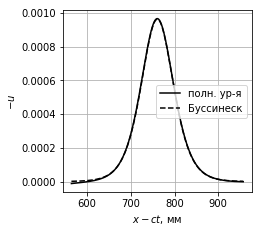

In [31]:
fig = plt.figure(figsize=(3.5,3))
k = -1
x = np.linspace(X0 + (v - c)*T[k] - 4*L_th, X0 + (v - c)*T[k] + 4*L_th, 1000)
u = -U[k, 0](None, 0, 0).diff()
plt.xlabel(r'$x - ct$, мм')
plt.ylabel(r'$-u$')
plt.plot(x, u(x + c*T[k]), color='black')
plt.plot(x, soliton(x, X0 + (v - c)*T[k], A_th, L_th), '--', color='black')
#plt.subplots_adjust(left=0.15, right=0.85, top=1, bottom=0.11)
plt.subplots_adjust(left=0.2, right=0.95, top=0.99, bottom=0.15)
plt.grid()
plt.legend(['полн. ур-я', 'Буссинеск'])
#plt.savefig(direct + 'SolCompareSmall2.pdf')

#XAL = sp.optimize.curve_fit(soliton, x, u(x + c*T[k]), (X0 + (v - c)*T[k], A_th, L_th))[0]
#XALB = sp.optimize.curve_fit(soliton, x, u(x + c*T[k]), (X0 + (v - c)*T[k], A_th, L_th, 0))[0]
#plt.plot(x, soliton(x, *XAL), '--')
#plt.plot(x, soliton(x, *XALB), ':')

In [32]:
(u(x + c*T[k]).max() - A_th)/A_th

0.0035236253672015325

## Comparison with Bq

In [172]:
direct = "Bq_ivp_soliton_gen_PS_A-0.001/"
U_Bq = np.load(direct + "U.npy")
T_Bq = np.load(direct + "T.npy")
X2 = np.load(direct + "X.npy")

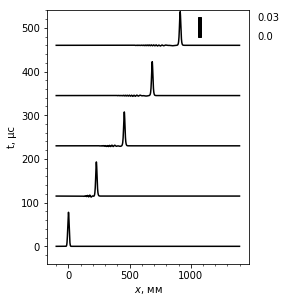

In [137]:
fig = plt.figure(figsize=(4,4))
ax = plt.axes()
ax.set_xlabel(r'$x$, мм')
ax.set_ylabel('t, μс')
ax.set_ylim(-40, 540)
sc = 45
for i in range(0, len(T_Bq), int(len(T_Bq)/6)):
    u2 = U_Bq[i]/A0
    ax.plot(X2, np.ones_like(X2)*T_Bq[i] - u2*sc, color = 'black')
rect = matplotlib.patches.Rectangle((1060,480), 20, sc, color='black',
                                   clip_on=False)
ax.add_patch(rect)
ax.text(0.88, 0.88, '0.0', transform=fig.transFigure)
ax.text(0.88, 0.945, '0.03', transform=fig.transFigure)
plt.subplots_adjust(left=0.15, right=0.85, top=0.98, bottom=0.1)
ax.minorticks_on()
plt.savefig(direct + 'ImpactBq.pdf')

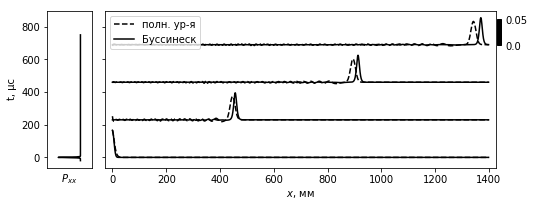

In [303]:
tau = 5
t0 = -4*tau
t_max = 750.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)

X = np.array(mesh_x.grid())[0]
fig = plt.figure(figsize=(8,2.6))
grid = plt.GridSpec(1, 8, wspace=0.3, hspace=0,
                    left=0.12, right=0.9, top=0.99, bottom=0.15)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1:], sharey=ax1)
ax1.set_xticks([])
ax1.set_xlabel(r'$P_{xx}$')
ax2.set_xlabel(r'$x$, мм')
ax1.set_ylabel('t, μс')
sc = 160
for i in range(4, len(T), int(len(T)/3)-2):
    u = U[i, 0].diff(0)(X + 0*T[i], 0, 0)/A0
    u2 = U_Bq[i - 4]/A0
    ax2.plot(X, np.ones_like(X)*T[i] - u*sc, '--', color = 'black')
    ax2.plot(X2[100:], np.ones_like(X2[100:])*T[i] - u2[100:]*sc, color = 'black')
ax2.margins(0.02)
rect = matplotlib.patches.Rectangle((1430,690), 15, sc, color='black',
                                   clip_on=False)
ax2.add_patch(rect)
ax2.text(0.915, 0.78, '0.0', transform=fig.transFigure)
ax2.text(0.915, 0.92, '0.05', transform=fig.transFigure)
ax1.plot(-2e-1*np.cosh(TT/2)**(-2), TT, color='black')
ax1.set_xlim(-0.3, 0.1)
ax2.legend(['полн. ур-я', 'Буссинеск'], loc=2)
plt.setp(ax2.get_yticklabels(), visible=False)
fig.savefig(direct + 'ImpactSmall.pdf')
plt.show()

In [176]:
A1 = -U[-1, 0].diff(0)(X + 0*T[i], 0, 0).min()
A2 = -U_Bq[-1].min()
(A2 - A1)/A1

0.1565866318953141

In [34]:
len(T)

1001

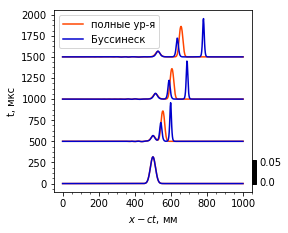

In [181]:
X1 = np.array(mesh_x.grid())[0]
fig = plt.figure(figsize=(4,3))
ax = plt.axes()
ax.set_xlabel(r'$x - ct$, мм')
ax.set_ylabel('t, мкс')
sc = 280
for i in range(0, len(T), int(len(T)/3)):
    u1 = U[i, 0].diff(0)(X1 + c*T[i], 0, 0)/A0
    u2 = U_Bq[i]/A0
    ax.plot(X1, np.ones_like(X1)*T[i] - u1*sc, color = 'orangered')
    ax.plot(X2, np.ones_like(X2)*T[i] - u2*sc, color = 'mediumblue')
rect = matplotlib.patches.Rectangle((1050,0), 20, sc, color='black',
                                   clip_on=False)
ax.add_patch(rect)
ax.text(0.905, 0.18, '0.0', transform=fig.transFigure)
ax.text(0.905, 0.27, '0.05', transform=fig.transFigure)
#plt.subplots_adjust(left=0.15, right=0.85, top=0.98, bottom=0.1)
plt.subplots_adjust(left=0.19, right=0.88, top=0.99, bottom=0.15)
ax.minorticks_on()
ax.legend(['полные ур-я', 'Буссинеск'])
plt.savefig(direct + 'SolEvolCompareSmallColor2.pdf')

In [316]:
A1 = np.max(-u1)
A2 = np.max(-u2)
(A2 - A1)/A1

0.2631639655786927

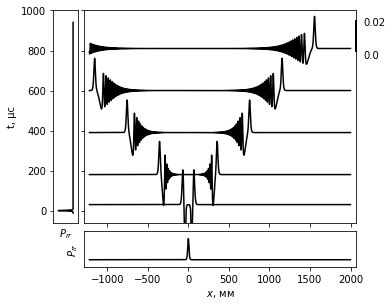

In [186]:
tau = 2
t0 = -6*tau
t_max = 940.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)

X = np.array(mesh_x.grid())[0]
fig = plt.figure(figsize=(5,4))
grid = plt.GridSpec(6, 10, wspace=0.25, hspace=0.25,
                    left=0.08, right=0.92, top=0.99, bottom=0.1)
ax1 = fig.add_subplot(grid[:-1, 0])
ax2 = fig.add_subplot(grid[:-1, 1:], sharey=ax1)
ax3 = fig.add_subplot(grid[-1, 1:])
ax1.set_xticks([])
ax3.set_yticks([])
ax1.set_xlabel(r'$P_{rr}$')
ax3.set_ylabel(r'$P_{rr}$')
ax3.set_xlabel(r'$x$, мм')
ax1.set_ylabel('t, μс')
ax2.margins(0.02)
ax3.margins(0.02)

start = 1950
X = np.array(mesh_x.grid())[0]
sc = 150
for i in range(5, len(T), int(len(T)/5)):
    u = U_Bq[i,start:]/A0
    ax2.plot(X2[start:]-L/2, np.ones_like(X2[start:])*T_Bq[i] - u*sc, color = 'black')
#ax.minorticks_on()
rect = matplotlib.patches.Rectangle((2050,800), 20, sc, color='black',
                                   clip_on=False)#, transform=fig.transFigure)
ax2.add_patch(rect)
ax2.text(0.94, 0.825, '0.0', transform=fig.transFigure)
ax2.text(0.94, 0.94, '0.02', transform=fig.transFigure)
ax1.plot(-3e-1*np.cosh(TT/2)**(-2), TT, color='black')
ax3.plot(X2[start:]-L/2, 3e-1*np.cosh((X2[start:] - L/2)/10)**(-2), color='black')
ax1.set_xlim(-0.4, 0.1)
ax3.set_ylim(-0.1, 0.4)
ax2.set_ylim(T[0], 1000)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
#fig.savefig(direct + 'SurfImpact.pdf')
plt.show()

# Group analysis

In [117]:
dirs = ['FullEqn_ivp_soliton_gen_PS_A-0.005/', 'FullEqn_ivp_soliton_gen_PS_A-0.010/', 
        'FullEqn_ivp_soliton_gen_PS_A-0.015/', 'FullEqn_ivp_soliton_gen_PS_A-0.020/',
        'FullEqn_ivp_soliton_gen_PS_A-0.025/', 'FullEqn_ivp_soliton_gen_PS_A-0.030/',
        'FullEqn_ivp_soliton_gen_PS_A-0.035/', 'FullEqn_ivp_soliton_gen_PS_A-0.040/',
        'FullEqn_ivp_soliton_gen_PS_A-0.045/', 'FullEqn_ivp_soliton_gen_PS_A-0.050/',
        'FullEqn_ivp_soliton_gen_PS_A-0.055/', 'FullEqn_ivp_soliton_gen_PS_A-0.060/',
        'FullEqn_ivp_soliton_gen_PS_A-0.065/', 'FullEqn_ivp_soliton_gen_PS_A-0.070/']

In [118]:
%run -i "FullEqn_ivp_soliton_gen_PS_A-0.010/data.py"

In [93]:
mesh_grid = np.load(dirs[0] + 'mesh_grid.npy')
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
X = mesh_grid[0]
T = np.load(dirs[0] + 'time.npy')
E = np.load(dirs[0] + 'energy.npy')
U_func = np.load(dirs[0] + 'displacement.npy')

In [94]:
# time indices for the wave shape analysis
ind = [1000, 1000, 500, 300, 
       300, 300, 200, 150, 
       150, 150, 150, 150,
       150, 150]

In [96]:
x = np.linspace(0, L, 1000)

def soliton(x, X, A, L, B=0):
    return A/(B + np.cosh((x - X)/L)**2)

def fit(k, thr=0.7, optimize=True):
    u = -U[k, 0](None, 0, 0).diff()(x + c*T[k])
    i = u.argmax()
    X = x[i]
    A = u[i]
    L = np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr))
    if optimize:
        mask = (x > X - 2*L)*(x < X + 2*L)
        X, A, L = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, L))[0]
    return X, A, L

In [ ]:
As = np.zeros(len(dirs))
Ls = np.zeros_like(As)
Vs = np.zeros_like(As)

for j in range(0, len(dirs)):
    T = np.load(dirs[j] + 'time.npy')
    U_func = np.load(dirs[j] + 'displacement.npy')
    U = TensorField(mesh, U_func)
    u = U[ind[j], 0].diff()(X + c*T[ind[j]], 0, 0)
    
    # amplitude
    As[j] = np.max(-u)
    
    # length
    peak_ind = np.argmax(-u)
    u_thr = u < -0.001*As[j]
    i = peak_ind
    while u_thr[i] == True:
        i = i + 1
    Ls[j] = 2*(X[i] - X[peak_ind])
    
    # velocity
    u2 = U[ind[j] - 15, 0].diff()(X + c*T[ind[j] - 15], 0, 0)
    peak2_ind = np.argmax(-u2)
    Xs = np.transpose([fit(k) for k in Progress(len(T))])[0]
    dV, X0 = np.polyfit(T[T > 3*T[-1]/4], Xs[T > 3*T[-1]/4], 1)
    #Vs[j] = c + (X[peak_ind] - X[peak2_ind])/(T[ind[j]] - T[ind[j] - 15])
    Vs[j] = c + dV

In [39]:
np.save('shape_params.npy', [As, Ls, Vs])

NameError: name 'As' is not defined

In [119]:
As, Ls, Vs = np.load('shape_params.npy')

In [120]:
tmp = np.zeros(1 + len(As))
tmp[1:] = As.copy()
As = tmp

In [121]:
tmp = np.zeros(1 + len(Vs))
tmp[0] = c
tmp[1:] = Vs
Vs = tmp

In [122]:
beta1 = 3*young + 2*l*(1-2*nu)**3 + 4*m*(1+nu)**2*(1-2*nu) + 6*n*nu**2
def V_th(A):
    return np.sqrt(c**2 + A*beta1/3/rho)

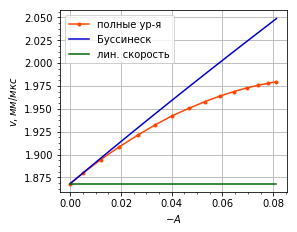

In [139]:
fig = plt.figure(figsize=(4.5,3))
ax = plt.axes()
#plt.subplots_adjust(left=0.15, right=0.85, top=0.98, bottom=0.11)
plt.subplots_adjust(left=0.15, right=0.85, top=0.99, bottom=0.15)
ax.plot(As, Vs, color='orangered', marker='.')
ax.plot(As, V_th(-As), color='mediumblue')
ax.plot(As, np.ones_like(As)*c, color='darkgreen')
ax.set_xlabel(r'$-А$')
ax.set_ylabel(r'$v, мм/мкс$')
ax.legend(['полные ур-я', 'Буссинеск', 'лин. скорость'])
plt.minorticks_on()
ax.grid()
fig.savefig('VelAmplColor.pdf')

# Grid 

In [3]:
x_s = 12
mesh_x = Multidomain(Legendre(x_s), np.linspace(-2, 2, 3))
mesh_r = Legendre(8, (R, 0), 'Radau')
mesh_phi = Fourier(16)
mesh = mesh_x*mesh_r*mesh_phi

Text(0.5, -0.18, 'единая сетка')

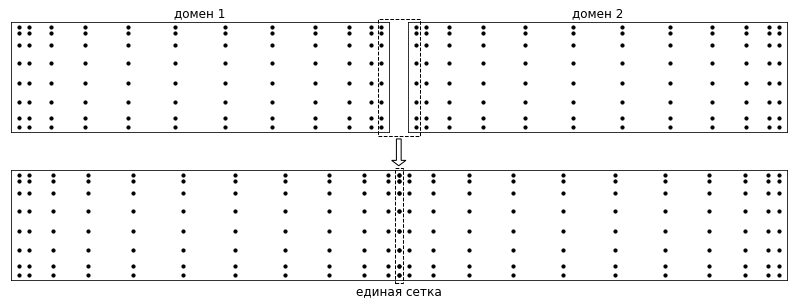

In [40]:
fig = plt.figure(figsize=(11, 4))
grid = plt.GridSpec(2, 2, wspace=0.05, hspace=0.35, 
                    left=0.01, right=0.99, top=0.95, bottom=0.055)
ax = []
ax.append(fig.add_subplot(grid[0, 0]))
ax.append(fig.add_subplot(grid[0, 1]))
ax.append(fig.add_subplot(grid[1, :]))

ax[0].set_title('домен 1')
ax[1].set_title('домен 2')
for i in range(3):
    if i < 2:
        X, Y = np.meshgrid(mesh.grid()[0][x_s*i:x_s*(i+1)], mesh.grid()[1])
        ax[i].scatter(X, Y, s=10, color='black')
        ax[i].margins(0.02, 0.03)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

rect1 = matplotlib.patches.Rectangle((0.4732, 0.555), .0536, 0.405, 
    transform=fig.transFigure, color='black', fill=False, 
    linestyle='--',clip_on=False)
rect2 = matplotlib.patches.Rectangle((0.495, 0.045), .01, 0.4,
    transform=fig.transFigure, color='black', fill=False, 
    linestyle='--',clip_on=False)
arrow = matplotlib.patches.Arrow(0.5, 0.545, 0, -0.093, 
    transform=fig.transFigure, width=0.03, color='black', fill=False)
fig.patches.append(rect1)
fig.patches.append(rect2)
fig.patches.append(arrow)

X, Y = np.meshgrid(mesh.grid()[0][:2*x_s], mesh.grid()[1])
ax[2].scatter(X, Y, s=10, color='black')
ax[2].margins(0.01, 0.03)
ax[2].set_title('единая сетка', y=-0.18)

In [472]:
fig.savefig('DomainConnect.pdf')

In [321]:
%matplotlib notebook

In [4]:
x_s = 10
mesh_x = Multidomain(Legendre(x_s), np.linspace(-2, 2, 3))
mesh_r = Legendre(8, (R, 0), 'Radau')
mesh_phi = Fourier(16)
mesh = mesh_x*mesh_r*mesh_phi

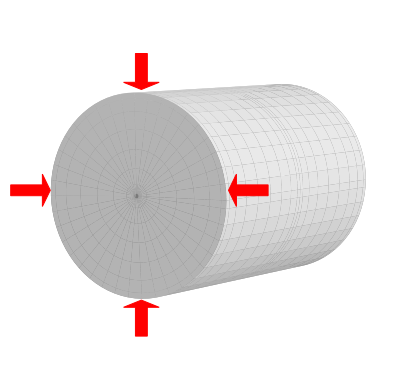

In [52]:
fig = plt.figure(figsize=(5.5,5))
ax = fig.add_subplot(111, projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.5, 1, 1, 1]))
origin = np.array([0, 0, 0])
#axis and radius
p0 = np.array([-2, 0, 0])
p1 = np.array([2, 0, 0])
R = 1
#vector in direction of axis
v = p1 - origin
#find magnitude of vector
mag = sp.linalg.norm(v)
#unit vector in direction of axis
v = v / mag
#make some vector not in the same direction as v
not_v = np.array([1, 0, 0])
if (v == not_v).all():
    not_v = np.array([0, 1, 0])
#make vector perpendicular to v
n1 = np.cross(v, not_v)
#normalize n1
n1 /= sp.linalg.norm(n1)
#make unit vector perpendicular to v and n1
n2 = np.cross(v, n1)
#surface ranges over t from 0 to length of axis and 0 to 2*pi
x = mesh.grid()[0]
r = mesh.grid()[1]
phi = np.linspace(0, 2*np.pi, 80)
phi2 = np.roll(mesh.grid()[2], 3)

#use meshgrid to make 2d arrays
rs, theta = np.meshgrid(r, phi)
rs2, theta2 = np.meshgrid(r, phi2)
t, theta3 = np.meshgrid(x, phi)
t2, theta4 = np.meshgrid(x, phi2)

X, Y, Z = [v[i] * t[:,:len(x)//2] + R * np.sin(theta3[:,:len(x)//2]) * n1[i] 
           + R * np.cos(theta3[:,:len(x)//2]) * n2[i] for i in [0, 1, 2]]
XX, YY, ZZ = [v[i] * t[:,len(x)//2:] + R * np.sin(theta3[:,len(x)//2:]) * n1[i] 
              + R * np.cos(theta3[:,len(x)//2:]) * n2[i] for i in [0, 1, 2]]
dR = R/1000
dX = p0[0]/1000
i_s, i_e = 0, 9
Xp, Yp, Zp = [v[i] * t2[i_s:i_e,:] + (R + dR) * np.sin(theta4[i_s:i_e,:]) * n1[i] 
              + (R + dR) * np.cos(theta4[i_s:i_e,:]) * n2[i] for i in [0, 1, 2]]
X2, Y2, Z2 = [p0[i] + rs[i] * np.sin(theta) * n1[i] 
              + rs[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]
X2p, Y2p, Z2p = [p0[i]*(1 - dX) + rs2[i] * np.sin(theta2) * n1[i] 
                 + rs2[i] * np.cos(theta2) * n2[i] for i in [0, 1, 2]]
X3, Y3, Z3 = [v[i]*mag + rs[i] * np.sin(theta) * n1[i] 
              + rs[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]

#ax.hold(True)
#ax.scatter(Xp, Yp, Zp, c='k', s=10, depthshade=False)
ax.plot_surface(X, Y, Z, alpha=1, color='0.92', linewidth=0)
ax.plot_surface(XX, YY, ZZ, alpha=1, color='0.92', linewidth=0)
ax.plot_surface(X2, Y2, Z2, color='0.7', shade=False)
#ax.scatter(X2p, Y2p, Z2p, c='k', s=10, depthshade=False)
ax.plot_surface(X3, Y3, Z3, color='w')

arrow = matplotlib.patches.Arrow(0.33, 0.095, 0, 0.1, 
    transform=fig.transFigure, width=0.15, color='k', fill=True)
fig.patches.append(arrow)
arrow = matplotlib.patches.Arrow(0.33, 0.88, 0, -0.1, 
    transform=fig.transFigure, width=0.15, color='k', fill=True)
fig.patches.append(arrow)
arrow = matplotlib.patches.Arrow(0.0, 0.5, 0.1, 0, 
    transform=fig.transFigure, width=0.15, color='k', fill=True)
fig.patches.append(arrow)
arrow = matplotlib.patches.Arrow(0.65, 0.5, -0.1, 0, 
    transform=fig.transFigure, width=0.15, color='red', fill=True)
fig.patches.append(arrow)

ax.view_init(elev=5, azim=-150)
ax.set_axis_off()
#plt.clim(0.5, 1)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

In [53]:
fig.savefig('ImpactScheme2.pdf')

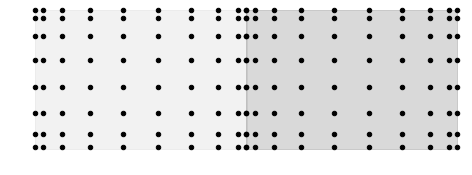

In [357]:
fig = plt.figure(figsize=(6, 2))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
ax = fig.add_subplot(111)
ax.set_axis_off()

X, Y = np.meshgrid(mesh.grid()[0][:2*x_s], mesh.grid()[1])
ax.scatter(X, Y, s=20, color='k')
ax.margins(0.01, 0.01)

rect1 = matplotlib.patches.Rectangle((0.011, 0.01), .49, 0.965, 
    transform=fig.transFigure, edgecolor='k', facecolor='k', alpha=0.05, clip_on=False)
rect2 = matplotlib.patches.Rectangle((0.5, 0.01), .489, 0.965,
    transform=fig.transFigure, edgecolor='k', facecolor='k', alpha=0.15, clip_on=False)
ax.add_patch(rect1)
ax.add_patch(rect2)

In [358]:
fig.savefig('Grid2D.pdf')

# Complex figures

In [72]:
direct = 'FullEqn_norm_force_soliton_gen_PS/'
T = np.load(direct + 'time.npy')

In [73]:
T.shape

(106,)

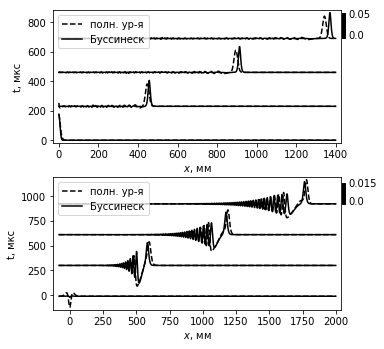

In [70]:
direct = 'FullEqn_norm_force_soliton_gen_PS/'
mesh_grid = np.load(direct + 'mesh_grid.npy')
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T = np.load(direct + 'time.npy')
T = T[:100]
E = np.load(direct + 'energy.npy')
mesh_x = Multidomain(Legendre(20), np.linspace(0, L, 121))
mesh_r = Legendre(5, (R, 0), 'Radau')
mesh_phi = Constant()
mesh = mesh_x*mesh_r*mesh_phi
U_func = np.load(direct + 'displacement.npy')
U = TensorField(mesh, U_func)
A0 = 0.015

direct = 'BqForced_normal_soliton_gen_PS/'
U_Bq = np.load(direct + "U.npy")
T_Bq = np.load(direct + "T.npy")
X2 = np.load(direct + "X.npy")

tau = 5
t0 = -4*tau
t_max = 1000.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)
start = 1150
start2 = 4800

fig = plt.figure(figsize=(5,5))
grid = plt.GridSpec(12, 10, wspace=0.3, hspace=0.3,
                    left=0.1, right=0.9, top=0.99, bottom=0.08)
#ax1 = fig.add_subplot(grid[6:11, 0])
ax2 = fig.add_subplot(grid[6:11, :])
#ax3 = fig.add_subplot(grid[11, 1:])
#ax1.set_xticks([])
#ax3.set_yticks([])
#ax1.set_xlabel(r'$P_{rr}$')
#ax3.set_ylabel(r'$P_{rr}$')
ax2.set_xlabel(r'$x$, мм')
ax2.set_ylabel('t, мкс')
ax2.margins(0.02)
#ax3.margins(0.02)

X = mesh_grid[0]
sc = 210
for i in range(5, len(T), int(len(T)/3)-2):
    u = U[i, 0].diff(0)(X[start:], 0, 0)/A0
    u2 = U_Bq[i - 4, start2:]/A0
    ax2.plot(X[start:]-L/2, np.ones_like(X[start:])*T[i] - u*sc, '--', color='k')
    ax2.plot(X2[start2:]-L/2, np.ones_like(X2[start2:])*T_Bq[i - 4] - u2*sc, color='k')
#ax2.minorticks_on()
rect = matplotlib.patches.Rectangle((2045,920), 28, sc, color='k', clip_on=False)
ax2.add_patch(rect)
ax2.text(0.92, 0.45, '0.0', transform=fig.transFigure)
ax2.text(0.92, 0.5, '0.015', transform=fig.transFigure)
# color='black'
#ax1.plot(-3e-1*np.cosh(TT/2)**(-2), TT, color='k')
#ax3.plot(X[start:]-L/2, 3e-1*np.cosh((X[start:] - L/2)/10)**(-2), color='k')
#ax1.set_xlim(-0.4, 0.1)
#ax3.set_ylim(-0.1, 0.4)
#plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax2.get_xticklabels(), visible=False)
ax2.legend(['полн. ур-я', 'Буссинеск'], loc=2)

direct = 'FullEqn_impact_A_0.2_PS_1400p/'
mesh_grid = np.load(direct + 'mesh_grid.npy')
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T = np.load(direct + 'time.npy')
E = np.load(direct + 'energy.npy')
mesh_x = Multidomain(Legendre(20), np.linspace(0, L, 71))
mesh_r = Legendre(5, (R, 0), 'Radau')
mesh_phi = Constant()
mesh = mesh_x*mesh_r*mesh_phi
U_func = np.load(direct + 'displacement.npy')
U = TensorField(mesh, U_func)
A0 = 0.05

direct = 'Bq_ivp_short_A_0.04_PS/'
U_Bq = np.load(direct + "U.npy")
T_Bq = np.load(direct + "T.npy")
X2 = np.load(direct + "X.npy")

tau = 5
t0 = -4*tau
t_max = 750.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)

X = mesh_grid[0]
#ax4 = fig.add_subplot(grid[:5, 0])
ax5 = fig.add_subplot(grid[:5, :])
#ax4.set_xticks([])
#ax4.set_xlabel(r'$P_{xx}$')
ax5.set_xlabel(r'$x$, мм')
ax5.set_ylabel('t, мкс')
sc = 170
for i in range(4, len(T), int(len(T)/3)-2):
    u = U[i, 0].diff(0)(X, 0, 0)/A0
    u2 = U_Bq[i - 4]/A0
    ax5.plot(X, np.ones_like(X)*T[i] - u*sc, '--', color='black')
    ax5.plot(X2[100:], np.ones_like(X2[100:])*T[i] - u2[100:]*sc, color='black')
ax5.margins(0.02)
rect = matplotlib.patches.Rectangle((1430,695), 15, sc, clip_on=False, color='k')
ax5.add_patch(rect)
ax5.text(0.92, 0.91, '0.0', transform=fig.transFigure)
ax5.text(0.92, 0.97, '0.05', transform=fig.transFigure)
#ax4.plot(-2e-1*np.cosh(TT/2)**(-2), TT, color='k')
#ax4.set_xlim(-0.3, 0.1)
ax5.legend(['полн. ур-я', 'Буссинеск'], loc=2)
#plt.setp(ax5.get_yticklabels(), visible=False)

fig.savefig('Impact2Black.pdf')
plt.show()

In [13]:
direct = 'FullEqn_norm_force_soliton_gen_PS/'
mesh_grid = np.load(direct + 'mesh_grid.npy')
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T = np.load(direct + 'time.npy')
E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')
U = TensorField(mesh, U_func)
A0 = 0.015

direct = 'BqForced_normal_soliton_gen_PS/'
U_Bq = np.load(direct + "U.npy")
T_Bq = np.load(direct + "T.npy")
X2 = np.load(direct + "X.npy")

In [14]:
tau = 5
t0 = -4*tau
t_max = 750.0
dt = 1.0
TT = np.arange(t0, t_max + dt/2, dt)

X = np.array(mesh_x.grid())[0]
ax4 = fig.add_subplot(grid[6:, 0])
ax5 = fig.add_subplot(grid[6:, 1:], sharey=ax4)
ax4.set_xticks([])
ax4.set_xlabel(r'$P_{xx}$')
ax5.set_xlabel(r'$x$, мм')
ax4.set_ylabel('t, μс')
sc = 160
for i in range(4, len(T), int(len(T)/3)-2):
    u = U[i, 0].diff(0)(X + 0*T[i], 0, 0)/A0
    u2 = U_Bq[i - 4]/A0
    ax5.plot(X, np.ones_like(X)*T[i] - u*sc, '--', color = 'black')
    ax5.plot(X2[100:], np.ones_like(X2[100:])*T[i] - u2[100:]*sc, color = 'black')
ax5.margins(0.02)
rect = matplotlib.patches.Rectangle((1430,690), 15, sc, color='black',
                                   clip_on=False)
ax5.add_patch(rect)
ax5.text(0.915, 0.78, '0.0', transform=fig.transFigure)
ax5.text(0.915, 0.92, '0.05', transform=fig.transFigure)
ax4.plot(-2e-1*np.cosh(TT/2)**(-2), TT, color='black')
ax4.set_xlim(-0.3, 0.1)
ax5.legend(['полн. ур-я', 'Буссинеск'], loc=2)
plt.setp(ax5.get_yticklabels(), visible=False)
fig.savefig(direct + 'ImpactSmall.pdf')
plt.show()

/home/feodor/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


ValueError: cannot reshape array of size 9600 into shape (4,1,70,newaxis)

# Error

In [54]:
%run -i 'simulation_samples/FullEqn_ivp_PS_dense_R40p_L800p/data.py'

<Figure size 432x288 with 0 Axes>

In [55]:
mesh_grid = np.load('simulation_samples/FullEqn_ivp_PS_dense_R40p_L800p/mesh_grid.npy')
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T = np.load('simulation_samples/FullEqn_ivp_PS_dense_R40p_L800p/time.npy')
E_etalon = np.load('simulation_samples/FullEqn_ivp_PS_dense_R40p_L800p/energy.npy')
U_func   = np.load('simulation_samples/FullEqn_ivp_PS_dense_R40p_L800p/displacement.npy')
U_etalon = TensorField(mesh, U_func)

In [56]:
x_ref = np.linspace(0, L, 2000, endpoint=False) + L/2/2000
r_ref = np.linspace(0, R, 100, endpoint=False) + R/2/100
t_ref = T.copy()
Np = len(x_ref)*len(r_ref)

In [57]:
U_etal_norm = np.sqrt(np.sum(np.abs(U_etalon[-1, :](x_ref, r_ref, 0))**2))

In [58]:
U_etal_norm

171.5948262126244

In [41]:
Np_arr = [i for i in range(10, 21, 2)] + [i for i in range(24, 41, 4)] 
Np_arr += [i for i in range(50, 71, 10)]

In [42]:
Np_arr2 = [i for i in range(11, 41, 5)] + [i for i in range(41, 72, 10)] 

In [43]:
Np_arr2

[11, 16, 21, 26, 31, 36, 41, 51, 61, 71]

In [59]:
err1 = np.zeros_like(Np_arr, dtype='double')
err2 = np.zeros_like(Np_arr, dtype='double')

In [45]:
for i in range(len(Np_arr)):
    d = 'simulation_samples/FullEqn_ivp_PS_R5p_L' + str(Np_arr[i]) + 'p/'
    mesh = Legendre(Np_arr[i], (0, L))*Legendre(5, (R, 0), 'Radau')*Constant()
    U_func = np.load(d + 'displacement.npy')
    U = TensorField(mesh, U_func)
    diff2 = np.abs(U_etalon[-1, :](x_ref, r_ref, 0) - U[-1, :](x_ref, r_ref, 0))**2
    err1[i] = np.sqrt(np.sum(diff2))/U_etal_norm

In [60]:
for i in range(len(Np_arr)):
    d = 'simulation_samples/FullEqn_ivp_PS_R10p_L' + str(Np_arr[i]) + 'p/'
    mesh = Legendre(Np_arr[i], (0, L))*Legendre(10, (R, 0), 'Radau')*Constant()
    U_func = np.load(d + 'displacement.npy')
    U = TensorField(mesh, U_func)
    diff2 = np.abs(U_etalon[-1, :](x_ref, r_ref, 0) - U[-1, :](x_ref, r_ref, 0))**2
    err2[i] = np.sqrt(np.sum(diff2))/U_etal_norm

In [83]:
err1[2:] = np.roll(err1[2:], -1)

In [84]:
err1[-1] = err1[-2]

In [46]:
err3 = np.zeros_like(Np_arr2, dtype='double')

In [47]:
for i in range(len(Np_arr2)):
    d = 'simulation_samples/FullEqn_ivp_PS_5dom_R5p_L' + str(Np_arr2[i]) + 'p/'
    mesh_x = Multidomain(Legendre(Np_arr2[i]), np.linspace(0, L, 6))
    mesh = mesh_x*Legendre(5, (R, 0), 'Radau')*Constant()
    U_func = np.load(d + 'displacement.npy')
    U = TensorField(mesh, U_func)
    diff2 = np.abs(U_etalon[-1, :](x_ref, r_ref, 0) - U[-1, :](x_ref, r_ref, 0))**2
    err3[i] = np.sqrt(np.sum(diff2))/U_etal_norm

In [61]:
err4 = np.zeros_like(Np_arr2, dtype='double')

In [62]:
for i in range(len(Np_arr2)):
    d = 'simulation_samples/FullEqn_ivp_PS_5dom_R10p_L' + str(Np_arr2[i]) + 'p/'
    mesh_x = Multidomain(Legendre(Np_arr2[i]), np.linspace(0, L, 6))
    mesh = mesh_x*Legendre(10, (R, 0), 'Radau')*Constant()
    U_func = np.load(d + 'displacement.npy')
    U = TensorField(mesh, U_func)
    diff2 = np.abs(U_etalon[-1, :](x_ref, r_ref, 0) - U[-1, :](x_ref, r_ref, 0))**2
    err4[i] = np.sqrt(np.sum(diff2))/U_etal_norm

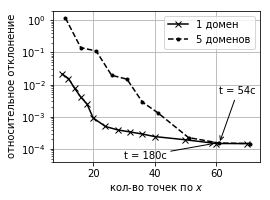

In [101]:
fig = plt.figure(figsize=(3.5,2.5))
ax = fig.add_subplot(111)
plt.subplots_adjust(left=0.18, right=1, top=1, bottom=0.16)
#ax.plot(Np_arr, err1, marker='.')
ax.plot(Np_arr, err2, color='k', marker='x')
#ax.plot(Np_arr2, err3, marker='.')
ax.plot(Np_arr2, err4, '--', color='k', marker='.')
ax.set_yscale('log')
ax.set_xlabel(r'кол-во точек по $x$')
ax.set_ylabel('относительное отклонение')
ax.grid()
plt.ylim([4e-5, 2])
#ax.legend([r'1 домен, $N_r=5$', r'1 домен, $N_r=10$',
#          r'5 доменов, $N_r=5$', r'5 доменов, $N_r=10$'])
ax.legend(['1 домен', '5 доменов'])
ax.annotate('t = 54с', xy=(Np_arr2[-2], err4[-2]), xytext=(61, 5e-3), 
             arrowprops=dict(arrowstyle="->"))
ax.annotate('t = 180с', xy=(Np_arr[-2], err4[-2]), xytext=(30, 5e-5), 
            arrowprops=dict(arrowstyle="->"))
fig.savefig('figures/ErrorBlack.pdf')
plt.show()

In [95]:
err4

array([1.18278627e+00, 1.40925679e-01, 1.11328832e-01, 1.95459530e-02, 1.47801119e-02, 2.87192991e-03, 1.33981234e-03,
       2.25821488e-04, 1.52971952e-04, 1.48039220e-04])

In [94]:
Np_arr2

[11, 16, 21, 26, 31, 36, 41, 51, 61, 71]

In [99]:
err4[2] = err4[1] - 0.01

In [80]:
err4[2]*=0.7